In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

In [30]:
breastcancer_df = pd.read_csv('../../../PycharmProjects/MachineLearningCS7641/BreastCancerDataset/breast-cancer-wisconsin.data')

breastcancer_df.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                           'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei',
                           'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class:']


In [45]:
breastcancer_df.head(23)


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,2,1,2,1,2,1,3,1,1,2
7,1033078,2,1,1,1,2,1,1,1,5,2
8,1033078,4,2,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


In [31]:
# use this command to assess how much of the data is usable and how much 
# can/should be imputed or held
breastcancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           698 non-null    int64 
 1   Clump Thickness              698 non-null    int64 
 2   Uniformity of Cell Size      698 non-null    int64 
 3   Uniformity of Cell Shape     698 non-null    int64 
 4   Marginal Adhesion            698 non-null    int64 
 5   Single Epithelial Cell Size  698 non-null    int64 
 6   Bare Nuclei                  698 non-null    object
 7   Bland Chromatin              698 non-null    int64 
 8   Normal Nucleoli              698 non-null    int64 
 9   Mitoses                      698 non-null    int64 
 10  Class:                       698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


count    698.000000
mean       2.690544
std        0.951596
min        2.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: Class:, dtype: float64


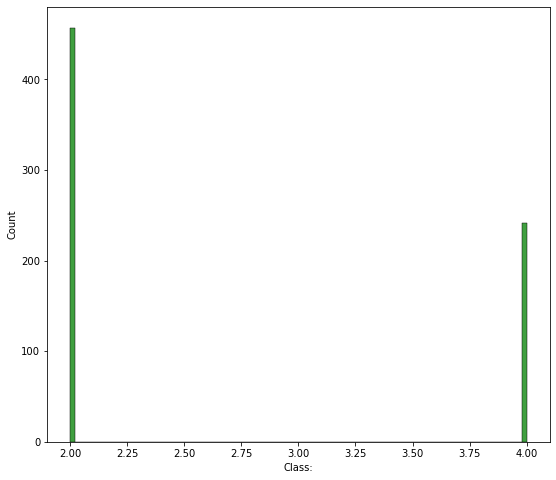

In [33]:
print(breastcancer_df['Class:'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(breastcancer_df['Class:'], color='g', bins=100);

In [48]:
list(set(breastcancer_df.dtypes.tolist()))

[dtype('int64'), dtype('O')]

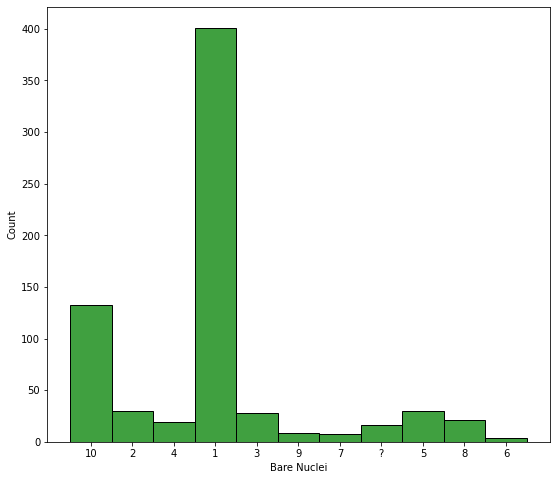

In [57]:
breastcancer_df['Bare Nuclei'].describe()
plt.figure(figsize=(9, 8))
sns.histplot(breastcancer_df['Bare Nuclei'], color='g', bins=100);
breastcancer_df['Bare Nuclei'] = breastcancer_df['Bare Nuclei'].replace('?','1')


In [58]:
breastcancer_df['Bare Nuclei'] = pd.to_numeric(breastcancer_df['Bare Nuclei'])

In [59]:
list(set(breastcancer_df.dtypes.tolist()))

[dtype('int64')]

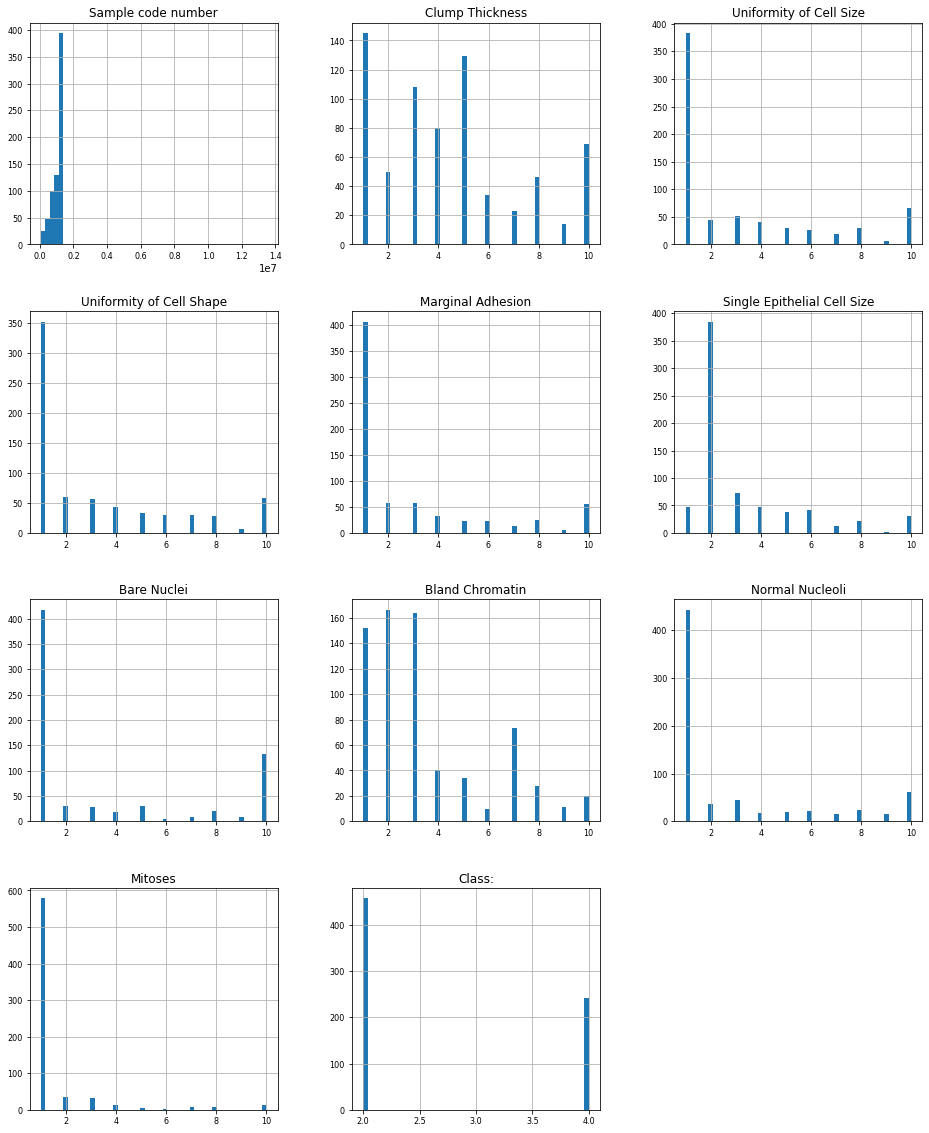

In [60]:
breastcancer_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [66]:
# find correlation between features

df_corr = breastcancer_df.corr()['Class:'][:-1] # ignore the actual class label
df_corr

Sample code number            -0.080378
Clump Thickness                0.716509
Uniformity of Cell Size        0.817772
Uniformity of Cell Shape       0.818794
Marginal Adhesion              0.696605
Single Epithelial Cell Size    0.682618
Bare Nuclei                    0.818839
Bland Chromatin                0.756732
Normal Nucleoli                0.712067
Mitoses                        0.423008
Name: Class:, dtype: float64

In [69]:
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with 'Class':\n{}".format(len(golden_features_list), golden_features_list))

There are 8 strongly correlated values with 'Class':
Bare Nuclei                    0.818839
Uniformity of Cell Shape       0.818794
Uniformity of Cell Size        0.817772
Bland Chromatin                0.756732
Clump Thickness                0.716509
Normal Nucleoli                0.712067
Marginal Adhesion              0.696605
Single Epithelial Cell Size    0.682618
Name: Class:, dtype: float64


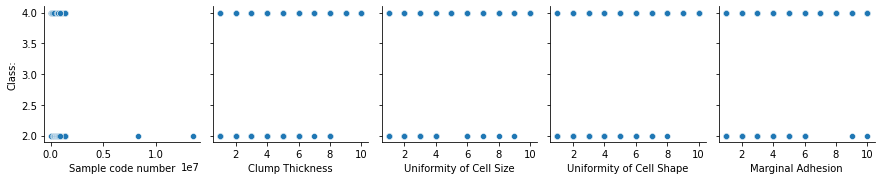

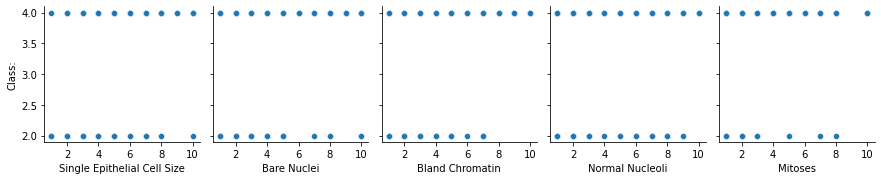

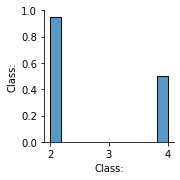

In [70]:
for i in range(0, len(breastcancer_df.columns), 5):
    sns.pairplot(data=breastcancer_df,
                x_vars=breastcancer_df.columns[i:i+5],
                y_vars=['Class:'])

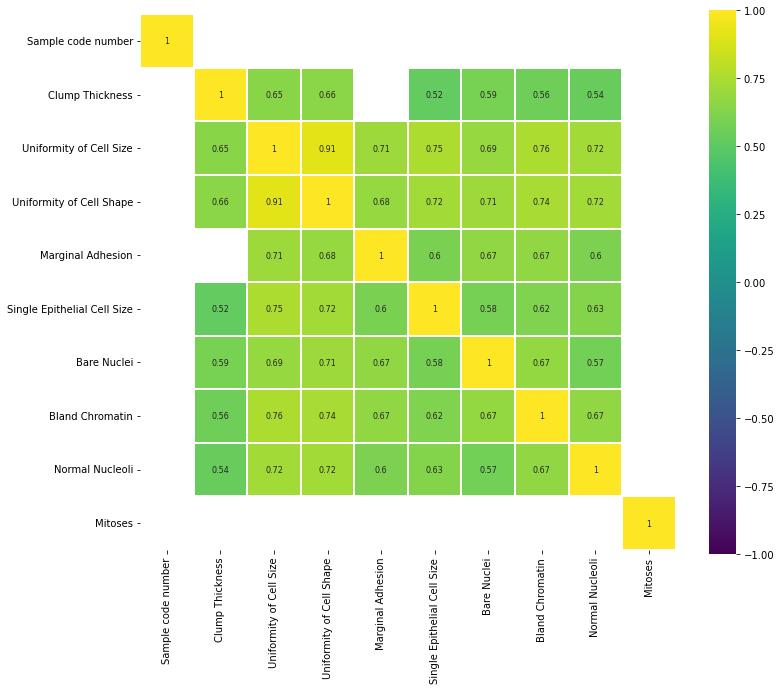

In [71]:
corr = breastcancer_df.drop('Class:', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# we can see that uniformity of cell size to uniformity of cell shape are highly correlated